In [41]:
import sys
import os

sys.path.insert(0, '/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction')

from tools import *
from config import *

In [73]:
path = Path('firemen/firepoint/2x2/test/occurence_kmeans_thresh/departement-01-ain/full_0_all_4_0_risk-size-watershed_node_kmeans_5_0.5_weight_one/xgboost_nbsinister_regression_rmse')

res = read_object('xgboost_nbsinister_regression_rmse_full_0_all_4_0_risk-size-watershed_node_kmeans_5_0.5_weight_one_z-score_Catboost_departement-01-ain_pred.pkl', path)

In [62]:
val = res[(res['nbsinister'] > 0) & (res['graph_id'] == 0)]['prediction'].min()

In [76]:
res[(res['nbsinister'] > 0) & (res['graph_id'] == 0) & (res['prediction'] == 0)][['date', 'nbsinister', 'prediction']]

,date,nbsinister,prediction
165,2103.0,1.0,0.0
179,2104.0,1.0,0.0
343,2119.0,1.0,0.0
661,2148.0,1.0,0.0
1350,2210.0,2.0,0.0
1368,2235.0,1.0,0.0
1781,2272.0,1.0,0.0
2611,2549.0,1.0,0.0


In [74]:
res[res['prediction'] == 0].nbsinister.unique()

array([0., 1., 2.])

In [75]:
res[(res['nbsinister'] > 0) & (res['graph_id'] == 0) & (res['date'] == 2563)][['date', 'nbsinister', 'prediction']]

,date,nbsinister,prediction
2766,2563.0,1.0,0.137528


In [ ]:
res[(res['nbsinister'] > 0) & (res['graph_id'] == 0) & (res['date'] < 0.1)]

In [83]:
dates = res[(res['nbsinister'] > 0) & (res['graph_id'] == 0) & (res['prediction'] == 0)][['date', 'nbsinister', 'prediction']].date.astype(int)
index = res[(res['nbsinister'] > 0) & (res['graph_id'] == 0) & (res['prediction'] == 0)][['date', 'nbsinister', 'prediction']].index.astype(int)
[[allDates[di], di] for di in dates], index

([['2023-03-16', 2103],
  ['2023-03-17', 2104],
  ['2023-04-01', 2119],
  ['2023-04-30', 2148],
  ['2023-07-01', 2210],
  ['2023-07-26', 2235],
  ['2023-09-01', 2272],
  ['2024-06-04', 2549]],
 Index([165, 179, 343, 661, 1350, 1368, 1781, 2611], dtype='int64'))

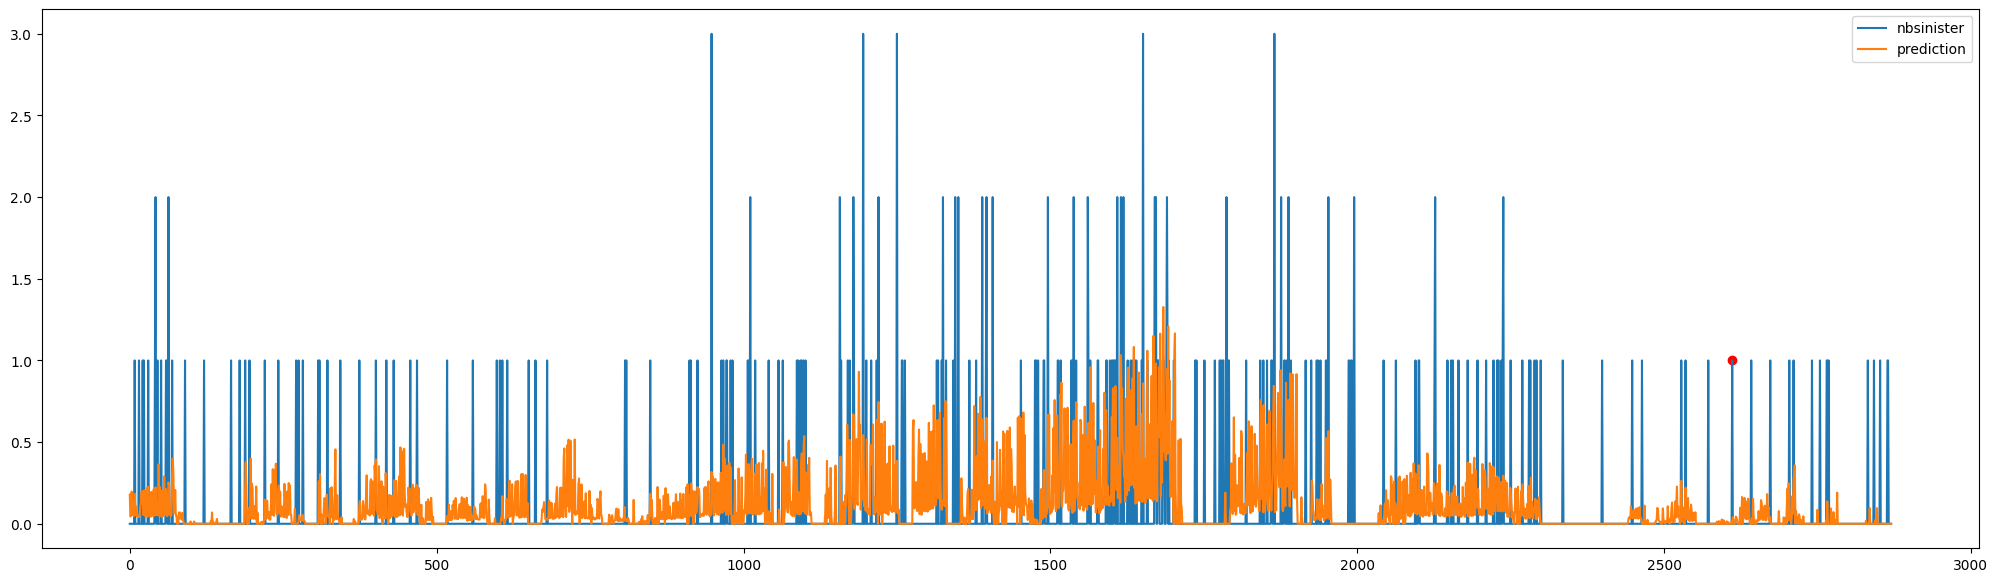

In [86]:
fig, ax = plt.subplots(figsize=(25,7))
res[['nbsinister', 'prediction']].plot(ax=ax)
ax.scatter(2611, 1, color='red')